**Lab01 - Xử lý ảnh số và video số**


**MSV: 20127284**
**Tên: Phùng Nghĩa Phúc** 

In [186]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import math

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Implement basic image processing operations with OpenCV library**

---




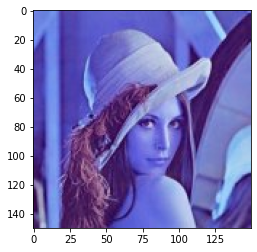

67500

In [188]:
# cv2.IMREAD_COLOR sẽ được giải mã theo thứ tự B G R.
img = cv.imread('/content/drive/MyDrive/Image_Processing/Histogram/Lenna.jpg',cv.IMREAD_COLOR)
# vì vậy khi hiển thị sẽ bị sai màu
plt.imshow(img)
plt.show()

img.size

(150, 150, 3)

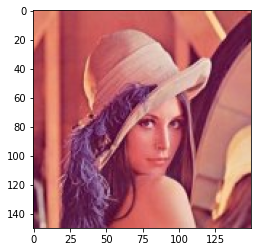

In [189]:
# sử dụng cvtColor để chuyển từ BGR sang RGB lại bằng tham COLOR_BGR2RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
# thông tin của bức ảnh trên, w x h x c 
img.shape

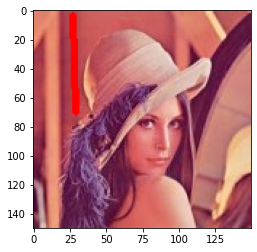

In [190]:
# vẽ đường, đoạn, hình tròn lên ảnh
#cv.line(image, điểm bắt đầu, điểm kết thúc, màu, độ dày đường)
cv.line(img, (27,3), (29,70), (255,0,0), 3)
plt.imshow(img)

màu tại vị trí pixel [cột, hàng]:  [255   0   0]


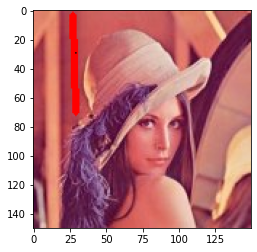

In [191]:
#thay đổi giá trị màu tại một vị trí
print("màu tại vị trí pixel [cột, hàng]: ", img[29, 29])
#đổi màu tại vị trí đó thành màu đen
img[29, 29] = (0,0,0)
plt.imshow(img)

Ví dụ cơ bản về edgeDectect

In [192]:
def egdeDetect(src, n):
  kernelsX = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
  kernelsY = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
  kernelsD1 = np.array([[-2,-1,0], [-1,0,1], [0,1,2]])
  kernelsD2 = np.array([[0,1,2], [-1,0,1], [-2,-1,0]])

  if n == 1:
    return cv.filter2D(src, -1, kernelsX)
  if n == 2:
    return cv.filter2D(src, -1, kernelsY)
  if n == 3:
    return cv.filter2D(src, -1, kernelsD1)
  if n == 4:
    return cv.filter2D(src, -1, kernelsD2)


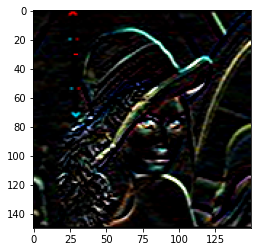

In [193]:
plt.imshow(egdeDetect(img,2))

2. **Implement edge detection with the algorithm learned in the theoretical class, compared with the built-in support function in OpenCV**
\
  **Including (algorithms to be performed):**
  1. Algorithm to transform color, transform geometry.
  2. Algorithm to smooth the image (image blurring, image smoothing).
  3. Edge detection algorithm

---



2.1 Implement edge detection by OpenCV

2.1.1 Laplace

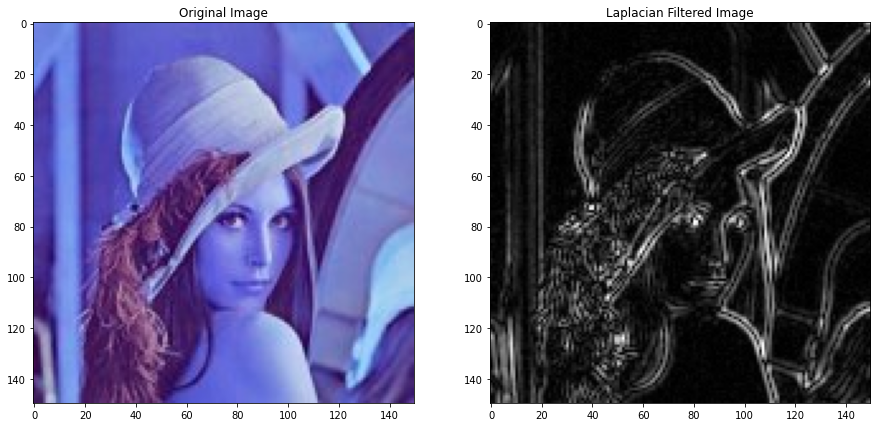

In [194]:
img_ori = cv.imread('/content/drive/MyDrive/Image_Processing/Histogram/Lenna.jpg',cv.IMREAD_COLOR)
img_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(img_gray,(3,3),0)
filter =  cv.Laplacian(img, ksize=3, ddepth= cv.CV_16S)
conv_filter = cv.convertScaleAbs(filter)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img_ori)

ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(conv_filter, cmap='gray')

2.1.2 Sobel 3x3

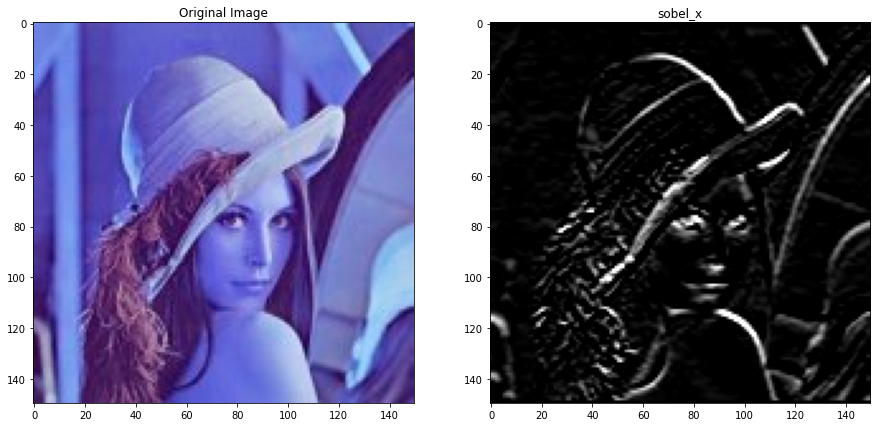

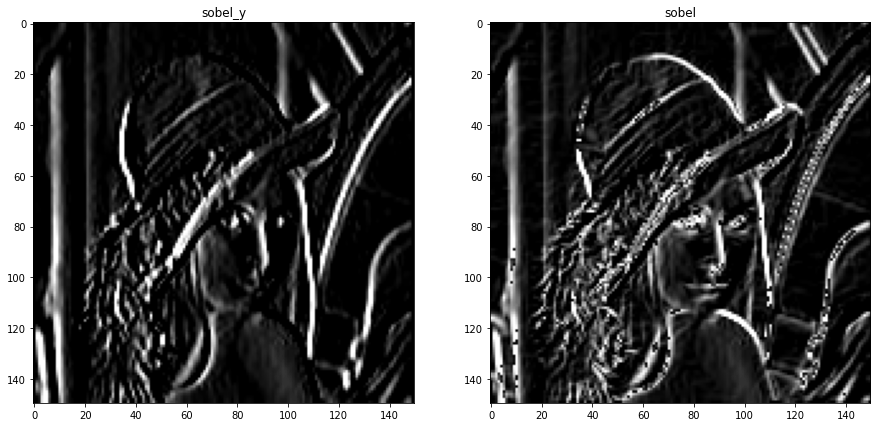

In [195]:
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

filter_y = cv.filter2D(img_gray, -1, sobel_y)
filter_x = cv.filter2D(img_gray, -1, sobel_x)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img_ori)

ax2.title.set_text('sobel_x')
ax2.imshow(filter_y, cmap = 'gray')

(fig, (ax3, ax4)) = plt.subplots(1, 2, figsize=(15, 15))
ax3.title.set_text('sobel_y')
ax3.imshow(filter_x, cmap = 'gray')

ax4.title.set_text('sobel')
ax4.imshow(filter_x + filter_y, cmap = 'gray')
plt.show()

2.1.3 Cany

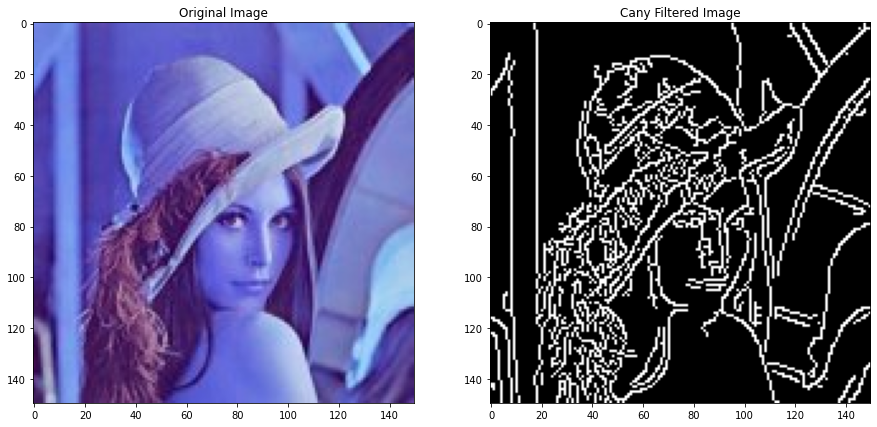

In [196]:
filter = cv.Canny(img_gray, threshold1=20, threshold2=200)


(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img_ori)

ax2.title.set_text('Cany Filtered Image')
ax2.imshow(filter, cmap='gray')

2.1.4 Prewitt

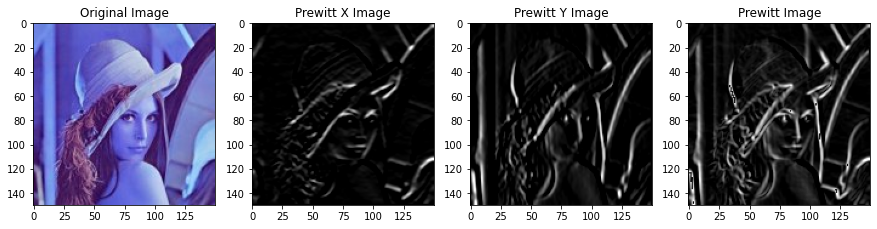

In [197]:
img = cv.GaussianBlur(img_gray,(3,3),0)

kernel_x = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
kernel_y = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])

prewitt_x = cv.filter2D(img, -1, kernel_x)
prewitt_y = cv.filter2D(img, -1, kernel_y)

(fig, (ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img_ori)

ax2.title.set_text('Prewitt X Image')
ax2.imshow(prewitt_x, cmap = 'gray')

ax3.title.set_text('Prewitt Y Image')
ax3.imshow(prewitt_y, cmap = 'gray')

ax4.title.set_text('Prewitt Image')
ax4.imshow(prewitt_x + prewitt_y, cmap = 'gray')

**2.2 Implement edge detection**

2.2.1 Sobel

**Define** kernal convolution function


In [198]:
def convolve(X, F): #X is image and F is filter
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    result = np.zeros((X_height, X_width))

    for i in np.arange(H, X_height - H):
        for j in np.arange(W, X_width - W):
            sum = 0
            for k in np.arange(-H, H + 1):
                for l in np.arange(-W, W + 1):
                    a = X[i + k, j + l]
                    w = F[H + k, W + l]
                    sum += (w * a)
            result[i,j] = sum
    return result

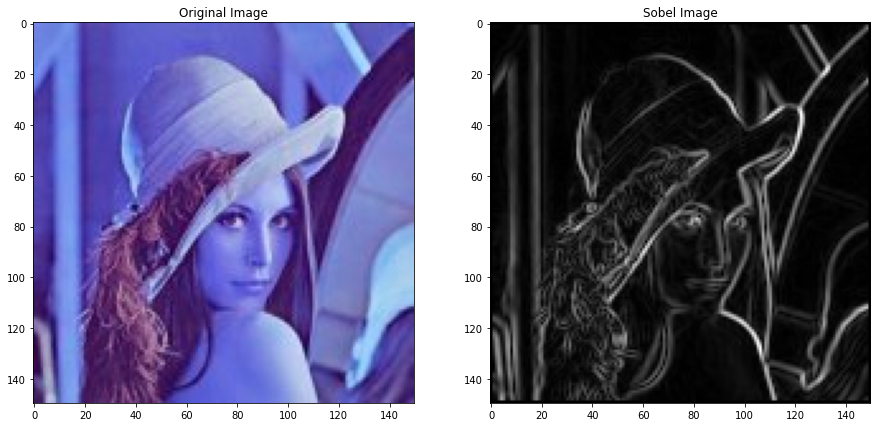

In [199]:
Gx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
Gy = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

img_ori = cv.imread('/content/drive/MyDrive/Image_Processing/Histogram/Lenna.jpg',cv.IMREAD_COLOR)
img_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)

sobel_x = convolve(img_gray, Gx) / 8.0
sobel_y = convolve(img_gray, Gy) / 8.0

cal_sobel = np.sqrt(np.power(sobel_x, 2) + np.power(sobel_y, 2))
sobel = (cal_sobel / np.max(cal_sobel)) * 255

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img_ori)

ax2.title.set_text('Sobel Image')
ax2.imshow(sobel, cmap = 'gray')

2.2.2 Prewitt

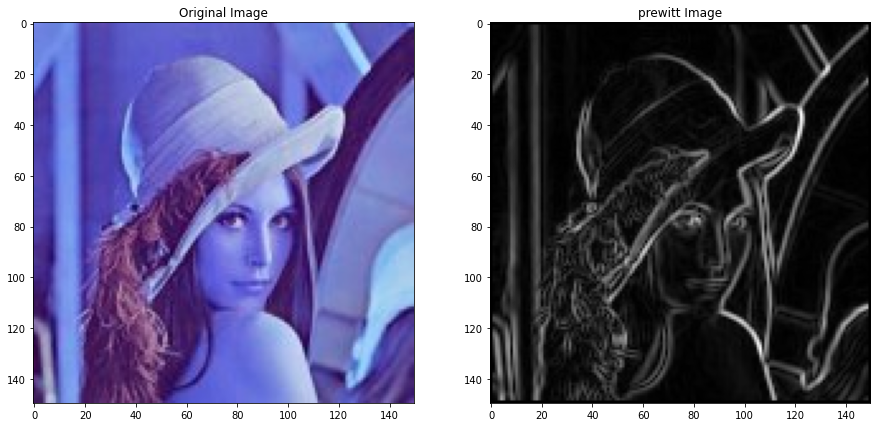

In [200]:
Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

img_ori = cv.imread('/content/drive/MyDrive/Image_Processing/Histogram/Lenna.jpg',cv.IMREAD_COLOR)
img_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)

prewitt_x = convolve(img_gray, Hx) / 6.0
prewitt_y = convolve(img_gray, Hy) / 6.0

cal_prewitt = np.sqrt(np.power(prewitt_x, 2) + np.power(prewitt_y, 2))
prewitt = (cal_prewitt / np.max(cal_prewitt)) * 255

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img_ori)

ax2.title.set_text('prewitt Image')
ax2.imshow(prewitt, cmap = 'gray')

2.2.3 Laplace


In [201]:
def laplace_of_gaussian(img_gray, sigma=1):
    len(img_gray.shape) == 2

    img = cv.GaussianBlur(img_gray, (0, 0), sigma)
    img = cv.Laplacian(img, cv.CV_64F)

    rows, cols = img.shape[0], img.shape[1]
    
    min_map = np.minimum.reduce(list(img[r:rows-2+r, c:cols-2+c] for r in range(3) for c in range(3)))
    max_map = np.maximum.reduce(list(img[r:rows-2+r, c:cols-2+c] for r in range(3) for c in range(3)))

    pos_img = 0 < img[1:rows-1, 1:cols-1]
    
    neg_min = min_map < 0
    neg_min[1 - pos_img] = 0

    pos_max = 0 < max_map
    pos_max[pos_img] = 0

    zero_cross = neg_min + pos_max

    value_scale = 255. / max(1., img.max() - img.min())
    values = value_scale * (max_map - min_map)
    values[1 - zero_cross] = 0.
    
    return values.astype(np.uint8)

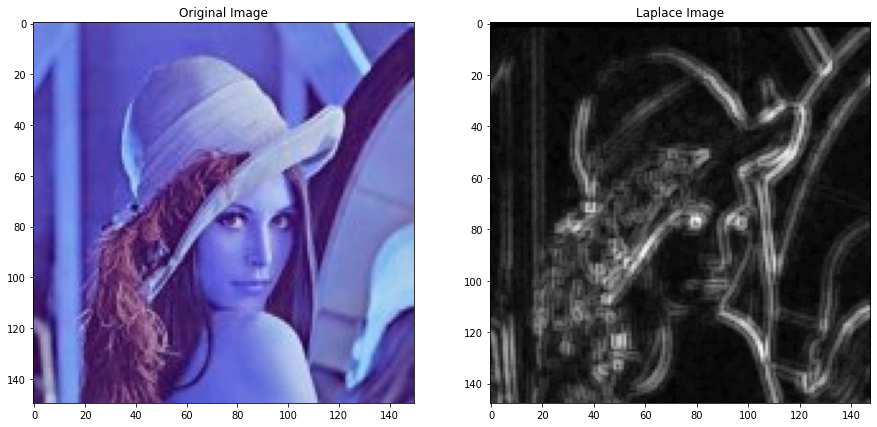

In [202]:
img_ori = cv.imread('/content/drive/MyDrive/Image_Processing/Histogram/Lenna.jpg',cv.IMREAD_COLOR)
img_gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)
laplace = laplace_of_gaussian(img_gray)
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img_ori)

ax2.title.set_text('Laplace Image')
ax2.imshow(laplace, cmap = 'gray')

2.2.4 Cany

In [203]:
def non_maxima_suppression(image, gradient_direction):
    rows_count = len(image)
    columns_count = len(image[0])

    output_image = np.zeros((rows_count, columns_count), dtype=np.int32)
    theta = gradient_direction * 180.0 / np.pi
    theta[theta < 0] += 180

    for i in range(1, rows_count - 1):
        for j in range(1, columns_count - 1):
            next = 255
            previous = 255
            if (0 <= theta[i, j] < 22.5) or (157.5 <= theta[i, j] <= 180):
                next = image[i, j + 1]
                previous = image[i, j - 1]
            elif 22.5 <= theta[i, j] < 67.5:
                next = image[i + 1, j - 1]
                previous = image[i - 1, j + 1]
            elif 67.5 <= theta[i, j] < 112.5:
                next = image[i + 1, j]
                previous = image[i - 1, j]
            elif 112.5 <= theta[i, j] < 157.5:
                next = image[i - 1, j - 1]
                previous = image[i + 1, j + 1]

            if (image[i, j] >= next) and (image[i, j] >= previous):
                output_image[i, j] = image[i, j]
            else:
                output_image[i, j] = 0

    return output_image

In [204]:
def double_threshold(image, low_threshold_ratio, high_threshold_ratio):
    high_threshold = image.max() * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio

    rows_count = len(image)
    columns_count = len(image[0])
    result = np.zeros((rows_count, columns_count), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)

    strong_i = []
    strong_j = []
    weak_i = []
    weak_j = []
    for i in range(len(image)):
        for j in range(len(image[0])):
            if image[i, j] >= high_threshold:
                strong_i.append(i)
                strong_j.append(j)
            if (image[i, j] <= high_threshold) & (image[i, j] >= low_threshold):
                weak_i.append(i)
                weak_j.append(j)
    strong_i = np.array(strong_i)
    strong_j = np.array(strong_j)
    weak_i = np.array(weak_i)
    weak_j = np.array(weak_j)

    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak

    return (result, weak, strong)

In [205]:
def hysteresis_edge_track(image, weak, strong=255):
    rows_count = len(image)
    columns_count = len(image[0])
    for i in range(1, rows_count - 1):
        for j in range(1, columns_count - 1):
            if image[i, j] == weak:
                if (
                    (image[i + 1, j - 1] == strong)
                    or (image[i + 1, j] == strong)
                    or (image[i + 1, j + 1] == strong)
                    or (image[i, j - 1] == strong)
                    or (image[i, j + 1] == strong)
                    or (image[i - 1, j - 1] == strong)
                    or (image[i - 1, j] == strong)
                    or (image[i - 1, j + 1] == strong)
                ):
                    image[i, j] = strong
                else:
                    image[i, j] = 0
    return image

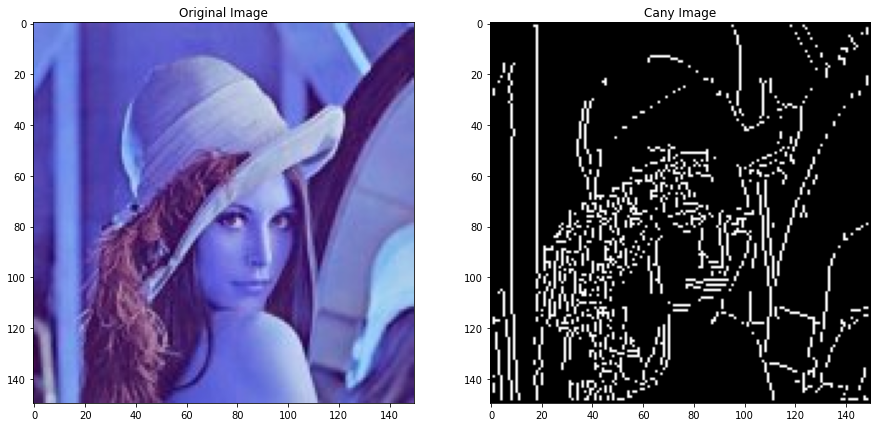

In [209]:
theta = np.arctan2(sobel_y, sobel_x)
image_with_thin_edges = non_maxima_suppression(sobel, theta)

final_image, weak, strong = double_threshold(image_with_thin_edges, 0.05, 0.15)

img = hysteresis_edge_track(final_image, weak, strong=255)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img_ori)
plt.title('Cany Image')
plt.imshow(img, cmap = 'gray')
plt.show()